<a href="https://colab.research.google.com/github/hugoplm/santander-coders/blob/master/6_Exercicio_CNN_CIFAR10/DL_CNN_CIFAR10_Hugo_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercício 2: Rede CNN pré-treinada

#Carregando os Dados

Informações do Dataset:

This is a dataset of 50,000 32x32 color training images and 10,000 test images, labeled over 10 categories

- Returns

Tuple of NumPy arrays: (x_train, y_train), (x_test, y_test).

In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from random import randint

In [2]:
(X_train_raw, y_train_raw), (X_test_raw, y_test_raw) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 13s 0us/step


In [3]:
print(X_train_raw.shape)
print(y_train_raw.shape)
print(X_test_raw.shape)
print(y_test_raw.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

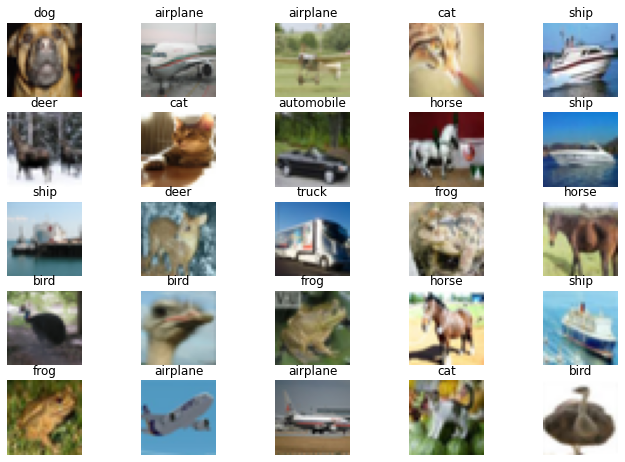

In [5]:
f, ax = plt.subplots(5,5)
f.subplots_adjust(0,0,1.5,1.5)
for i in range(0,5,1):
  for j in range(0,5,1):
    rnd_number = randint(0,len(X_train_raw))
    ax[i,j].imshow(X_train_raw[rnd_number], cmap=plt.cm.binary)
    ax[i,j].set_title(class_names[int(y_train_raw[rnd_number])])
    ax[i,j].axis('off')

# Pré-processamento dos Dados

In [6]:
X_train, X_val, y_train, y_val = train_test_split(
     X_train_raw, y_train_raw, stratify=y_train_raw, test_size=0.20, random_state=42)

In [7]:
X_train = X_train/255
X_val = X_val/255

In [8]:
hot = OneHotEncoder()
y_train = hot.fit_transform(y_train.reshape(-1,1)).toarray()
y_val = hot.transform(y_val.reshape(-1,1)).toarray()

Distribuição das classes

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


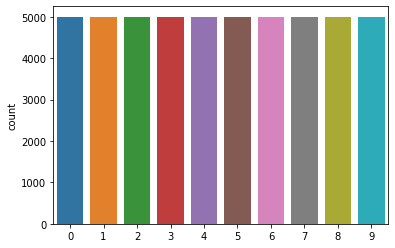

In [9]:
import seaborn as sns
sns.countplot(y_train_raw.flatten());

# Modelo CNN - Redes Pré-Treinadas

Carregando as Bibliotecas

In [44]:
from tensorflow.keras.layers import Flatten,Dense,Dropout,Conv2D,MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.python.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import VGG16, ResNet152V2, EfficientNetV2S

**VGG**

In [22]:
model_VGG = VGG16(
    weights="imagenet",  
    input_shape=(32, 32, 3),
    include_top=False,
)

In [23]:
flatten = Flatten()
dense = Dense(10,activation='softmax')

rede_VGG = Sequential([
  VGG_model,
  flatten,
  dense
])

In [24]:
rede_VGG.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', 
            metrics=['accuracy'])

In [25]:
es = EarlyStopping(monitor='val_loss', min_delta = 0.001, patience = 5)

In [27]:
hist_VGG = rede_VGG.fit(X_train, 
                        y_train, 
                        epochs = 50,
                        batch_size=64,
                        validation_data = (X_val, y_val),
                        callbacks=[es])

Epoch 1/50
625/625 [==============================] - 24s 39ms/step - loss: 0.3871 - accuracy: 0.8726 - val_loss: 0.8218 - val_accuracy: 0.7706
Epoch 2/50
625/625 [==============================] - 24s 39ms/step - loss: 0.3386 - accuracy: 0.8900 - val_loss: 0.7249 - val_accuracy: 0.7840
Epoch 3/50
625/625 [==============================] - 25s 40ms/step - loss: 0.3039 - accuracy: 0.9005 - val_loss: 0.7665 - val_accuracy: 0.7764
Epoch 4/50
625/625 [==============================] - 24s 38ms/step - loss: 0.2671 - accuracy: 0.9134 - val_loss: 0.9835 - val_accuracy: 0.7756
Epoch 5/50
625/625 [==============================] - 24s 39ms/step - loss: 0.2384 - accuracy: 0.9237 - val_loss: 0.7976 - val_accuracy: 0.7879
Epoch 6/50
625/625 [==============================] - 25s 40ms/step - loss: 0.2038 - accuracy: 0.9356 - val_loss: 0.8547 - val_accuracy: 0.7815
Epoch 7/50
625/625 [==============================] - 24s 39ms/step - loss: 0.1940 - accuracy: 0.9392 - val_loss: 0.9378 - val_accuracy:

In [28]:
from sklearn.metrics import accuracy_score

y_pred_VGG = rede_VGG.predict(X_val)
print(accuracy_score(y_val.argmax(1), y_pred_VGG.argmax(1)))

0.7867


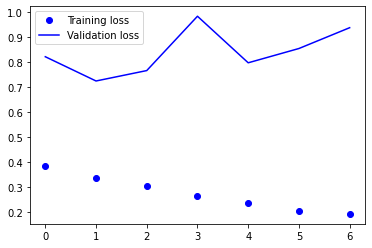

In [29]:
loss_VGG = hist_VGG.history['loss']
val_loss_VGG = hist_VGG.history['val_loss']
epochs = range(len(loss_VGG))
plt.figure()
plt.plot(epochs, loss_VGG, 'bo', label='Training loss')
plt.plot(epochs, val_loss_VGG, 'b', label='Validation loss')
plt.legend()
plt.show()

**ResNet**

In [30]:
model_RN = ResNet152V2(
    weights="imagenet",  
    input_shape=(32, 32, 3),
    include_top=False,
)

234561536/234545216 [==============================] - 5s 0us/step


In [32]:
flatten = Flatten()
dense = Dense(10,activation='softmax')

rede_RN = Sequential([
  model_RN,
  flatten,
  dense
])

In [33]:
rede_RN.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', 
            metrics=['accuracy'])

In [34]:
es = EarlyStopping(monitor='val_loss', min_delta = 0.001, patience = 5)

In [35]:
hist_RN = rede_RN.fit(X_train, 
                      y_train, 
                      epochs = 50,
                      batch_size=64,
                      validation_data = (X_val, y_val),
                      callbacks=[es])

Epoch 1/50
625/625 [==============================] - 87s 116ms/step - loss: 2.4184 - accuracy: 0.1006 - val_loss: 18243.0020 - val_accuracy: 0.1000
Epoch 2/50
625/625 [==============================] - 84s 135ms/step - loss: 2.4164 - accuracy: 0.1035 - val_loss: 804.7637 - val_accuracy: 0.1423
Epoch 3/50
625/625 [==============================] - 79s 127ms/step - loss: 2.3849 - accuracy: 0.1132 - val_loss: 2.2992 - val_accuracy: 0.1045
Epoch 4/50
625/625 [==============================] - 80s 127ms/step - loss: 2.3632 - accuracy: 0.1192 - val_loss: 2.2890 - val_accuracy: 0.1122
Epoch 5/50
625/625 [==============================] - 72s 116ms/step - loss: 2.2764 - accuracy: 0.1602 - val_loss: 2.9532 - val_accuracy: 0.1744
Epoch 6/50
625/625 [==============================] - 76s 122ms/step - loss: 2.1858 - accuracy: 0.1833 - val_loss: 2.1117 - val_accuracy: 0.1880
Epoch 7/50
625/625 [==============================] - 76s 121ms/step - loss: 2.2661 - accuracy: 0.1775 - val_loss: 421.0907 

In [36]:
from sklearn.metrics import accuracy_score

y_pred_RN = rede_RN.predict(X_val)
print(accuracy_score(y_val.argmax(1), y_pred_RN.argmax(1)))

0.1915


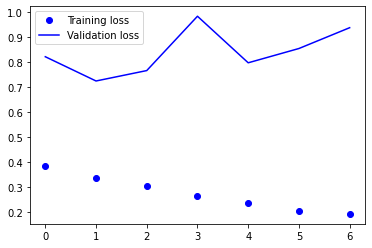

In [37]:
loss_RN = hist_RN.history['loss']
val_loss_RN = hist_RN.history['val_loss']
epochs = range(len(loss_RN))
plt.figure()
plt.plot(epochs, loss_RN, 'bo', label='Training loss')
plt.plot(epochs, val_loss_RN, 'b', label='Validation loss')
plt.legend()
plt.show()

**EfficientNet**

In [45]:
model_EN = EfficientNetV2S(
    weights="imagenet",  
    input_shape=(32, 32, 3),
    include_top=False,
)

82436096/82420632 [==============================] - 2s 0us/step


In [46]:
flatten = Flatten()
dense = Dense(10,activation='softmax')

rede_EN = Sequential([
  model_EN,
  flatten,
  dense
])

In [47]:
rede_EN.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', 
            metrics=['accuracy'])

In [48]:
es = EarlyStopping(monitor='val_loss', min_delta = 0.001, patience = 5)

In [49]:
hist_EN = rede_EN.fit(X_train, 
                      y_train, 
                      epochs = 50,
                      batch_size=64,
                      validation_data = (X_val, y_val),
                      callbacks=[es])

Epoch 1/50
625/625 [==============================] - 71s 77ms/step - loss: 1.2129 - accuracy: 0.5731 - val_loss: 1.7648 - val_accuracy: 0.4118
Epoch 2/50
625/625 [==============================] - 41s 65ms/step - loss: 0.7371 - accuracy: 0.7480 - val_loss: 1.8563 - val_accuracy: 0.4357
Epoch 3/50
625/625 [==============================] - 43s 68ms/step - loss: 0.5225 - accuracy: 0.8225 - val_loss: 1.7584 - val_accuracy: 0.4537
Epoch 4/50
625/625 [==============================] - 43s 69ms/step - loss: 0.5191 - accuracy: 0.8238 - val_loss: 2.9615 - val_accuracy: 0.2563
Epoch 5/50
625/625 [==============================] - 42s 67ms/step - loss: 0.3458 - accuracy: 0.8850 - val_loss: 3.3003 - val_accuracy: 0.1639
Epoch 6/50
625/625 [==============================] - 42s 68ms/step - loss: 0.2359 - accuracy: 0.9201 - val_loss: 1.1373 - val_accuracy: 0.7017
Epoch 7/50
625/625 [==============================] - 42s 68ms/step - loss: 0.1844 - accuracy: 0.9355 - val_loss: 3.4557 - val_accuracy:

In [51]:
from sklearn.metrics import accuracy_score

y_pred_EN = rede_EN.predict(X_val)
print(accuracy_score(y_val.argmax(1), y_pred_EN.argmax(1)))

0.5748


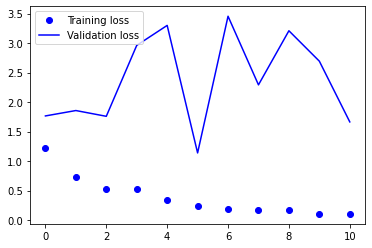

In [50]:
loss_EN = hist_EN.history['loss']
val_loss_EN = hist_EN.history['val_loss']
epochs = range(len(loss_EN))
plt.figure()
plt.plot(epochs, loss_EN, 'bo', label='Training loss')
plt.plot(epochs, val_loss_EN, 'b', label='Validation loss')
plt.legend()
plt.show()

**VGG com Novas Camadas na Saída**

Comparando o resultado encontrado utilizando as redes pré-treinadas VGG, ResNet e EfficientNet, foi possível perceber que a VGG apresentou a melhor acúracia para a base de dados CIFAR10. Dessa forma, selecionei esse modelo para avaliar o resultado de implementar uma nova camada densa na saída.

In [62]:
model_VGG_novo = VGG16(
    weights="imagenet",  
    input_shape=(32, 32, 3),
    include_top=False,
)

In [63]:
flatten = Flatten()
dense1 = Dense(100,activation='relu')
dense2 = Dense(10,activation='softmax')

rede_VGG_novo = Sequential([
  model_VGG_novo,
  flatten,
  dense1,
  dense2
])

In [64]:
rede_VGG_novo.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', 
            metrics=['accuracy'])

In [65]:
es = EarlyStopping(monitor='val_loss', min_delta = 0.001, patience = 5)

In [66]:
hist_VGG_novo = rede_VGG_novo.fit(X_train, 
                                  y_train, 
                                  epochs = 50,
                                  batch_size=64,
                                  validation_data = (X_val, y_val),
                                  callbacks=[es])

Epoch 1/50
625/625 [==============================] - 24s 38ms/step - loss: 1.8304 - accuracy: 0.2755 - val_loss: 1.3970 - val_accuracy: 0.4547
Epoch 2/50
625/625 [==============================] - 23s 37ms/step - loss: 1.2726 - accuracy: 0.5181 - val_loss: 1.1061 - val_accuracy: 0.5976
Epoch 3/50
625/625 [==============================] - 23s 38ms/step - loss: 0.9734 - accuracy: 0.6601 - val_loss: 0.8938 - val_accuracy: 0.6922
Epoch 4/50
625/625 [==============================] - 24s 38ms/step - loss: 0.7946 - accuracy: 0.7300 - val_loss: 0.8480 - val_accuracy: 0.7121
Epoch 5/50
625/625 [==============================] - 24s 39ms/step - loss: 0.6802 - accuracy: 0.7742 - val_loss: 0.8606 - val_accuracy: 0.7407
Epoch 6/50
625/625 [==============================] - 25s 40ms/step - loss: 0.5966 - accuracy: 0.8009 - val_loss: 0.7330 - val_accuracy: 0.7542
Epoch 7/50
625/625 [==============================] - 25s 40ms/step - loss: 0.5215 - accuracy: 0.8289 - val_loss: 0.7435 - val_accuracy:

In [67]:
from sklearn.metrics import accuracy_score

y_pred_VGG_novo = rede_VGG_novo.predict(X_val)
print(accuracy_score(y_val.argmax(1), y_pred_VGG_novo.argmax(1)))

0.7679


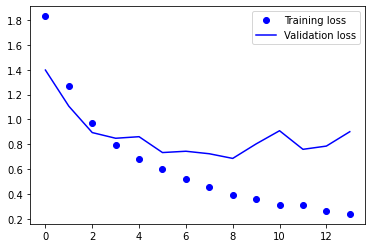

In [68]:
loss_VGG_novo = hist_VGG_novo.history['loss']
val_loss_VGG_novo = hist_VGG_novo.history['val_loss']
epochs = range(len(loss_VGG_novo))
plt.figure()
plt.plot(epochs, loss_VGG_novo, 'bo', label='Training loss')
plt.plot(epochs, val_loss_VGG_novo, 'b', label='Validation loss')
plt.legend()
plt.show()

# Avaliação do Modelo com os Dados de Teste

Por último, vamos avaliar o resultado com os dados de teste no melhor modelo pré-treinado encontrado (acurácia dos dados de validação): VGG

In [69]:
X_test = X_test_raw / 255
y_test = hot.transform(y_test_raw.reshape(-1,1)).toarray()

In [71]:
pred_test = rede_VGG.predict(X_test)
print(accuracy_score(y_test.argmax(1), pred_test.argmax(1)))

0.779
